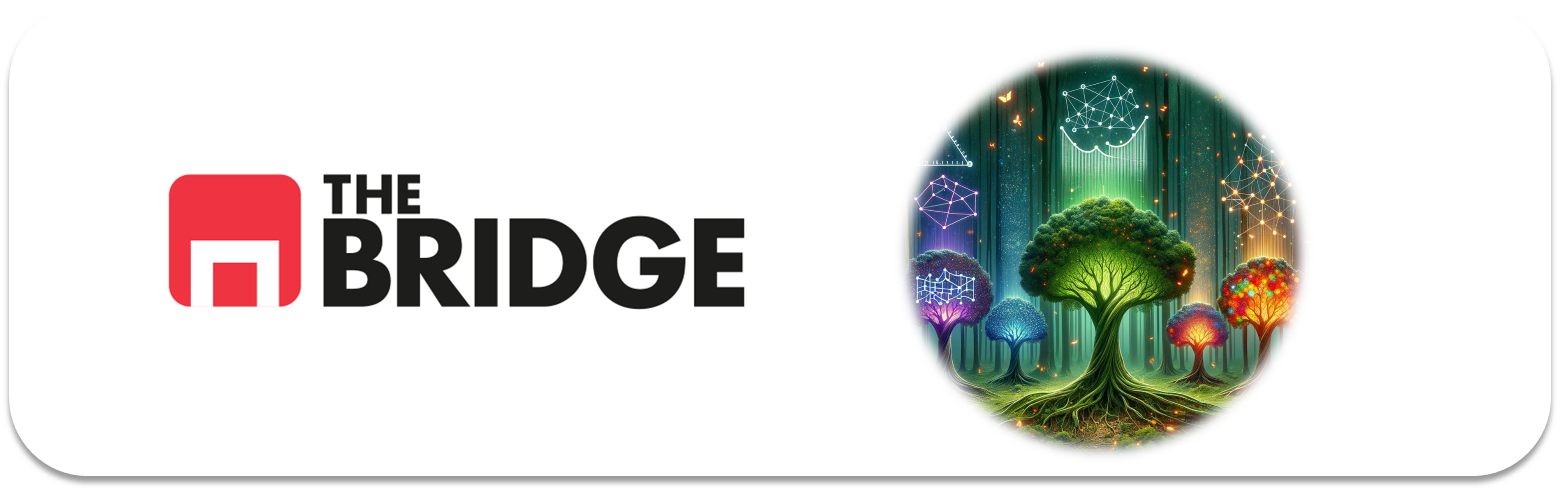

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descargar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint 

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianamante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [57]:
path = r"https://raw.githubusercontent.com/rodolso/DS_Online_Octubre24_Exercises/refs/heads/main/04_Machine_Learning/Sprint_11/Unidad_01/Practica_Obligatoria/data/bank-full.csv"

In [58]:
df = pd.read_csv(path, sep = ";")

In [59]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
19078,34,blue-collar,single,tertiary,no,42,no,no,cellular,5,aug,297,1,-1,0,unknown,no
24956,36,management,married,tertiary,no,1100,yes,no,cellular,18,nov,93,1,-1,0,unknown,no
8538,34,blue-collar,single,secondary,no,-42,yes,yes,unknown,3,jun,294,2,-1,0,unknown,no
1526,33,admin.,married,secondary,no,61,yes,yes,unknown,8,may,116,2,-1,0,unknown,no
3473,32,management,single,secondary,no,6,yes,no,unknown,15,may,228,1,-1,0,unknown,no
20761,53,retired,married,tertiary,no,7132,no,no,cellular,13,aug,88,2,-1,0,unknown,no
33146,56,services,single,secondary,no,699,yes,no,cellular,20,apr,193,1,-1,0,unknown,no
16679,40,services,married,secondary,no,-345,yes,no,cellular,24,jul,39,2,-1,0,unknown,no
35384,53,blue-collar,married,secondary,no,148,yes,no,cellular,7,may,66,1,359,1,failure,no
36689,48,management,married,secondary,no,2204,yes,no,cellular,12,may,45,1,-1,0,unknown,no


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* No hay valores nulos

In [61]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


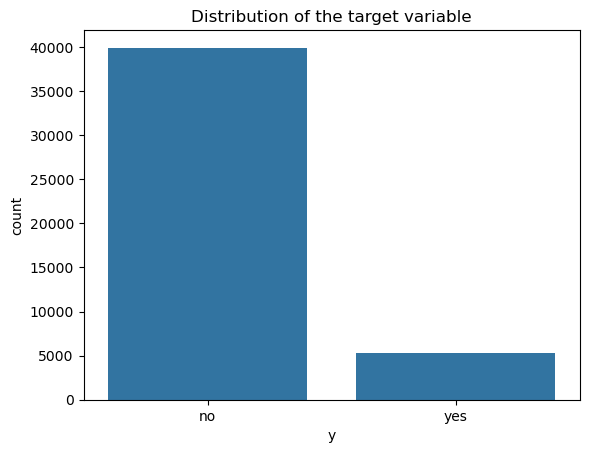

In [62]:
# Selecting the target variable and showing the distribution of the target variable
target = df["y"]
print(df["y"].value_counts(normalize = True))
sns.countplot(x = "y", data = df)
plt.title("Distribution of the target variable")
plt.show()

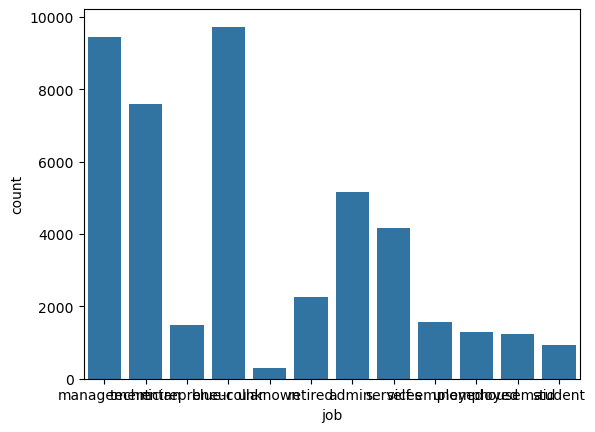

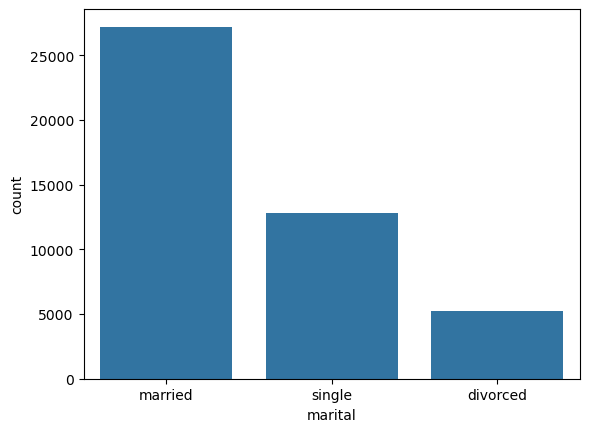

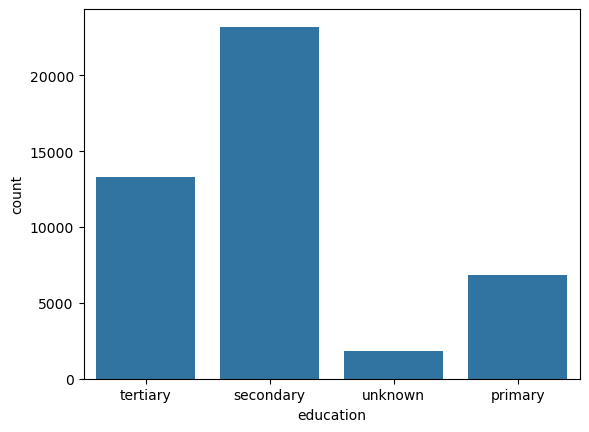

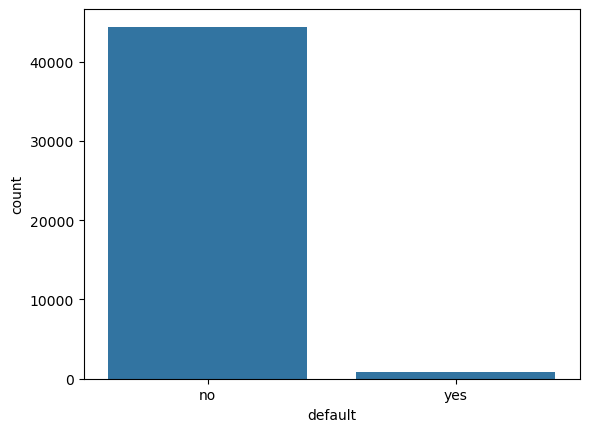

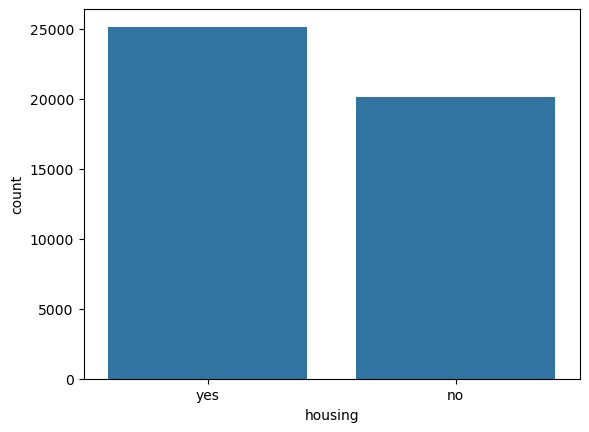

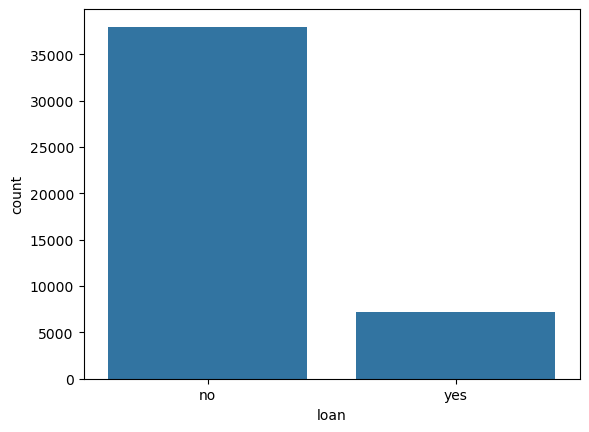

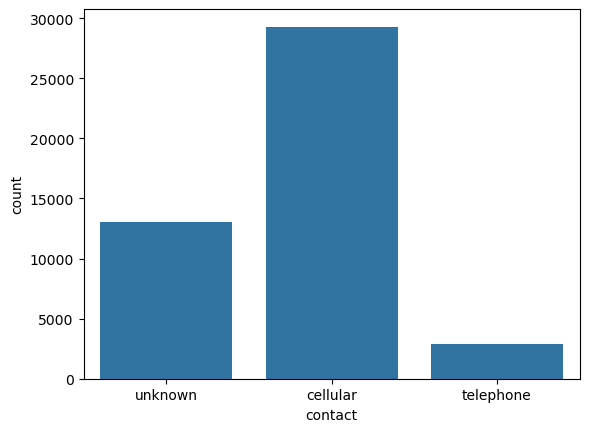

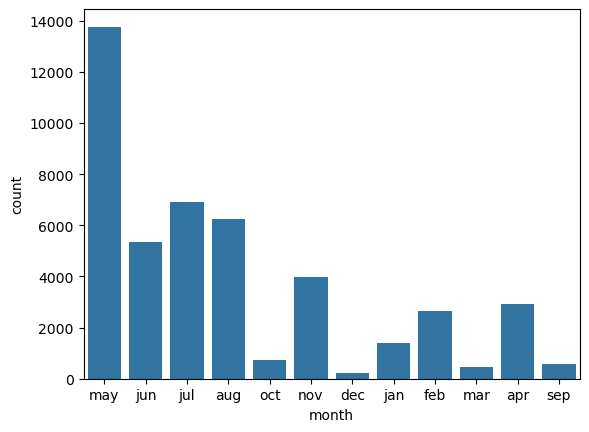

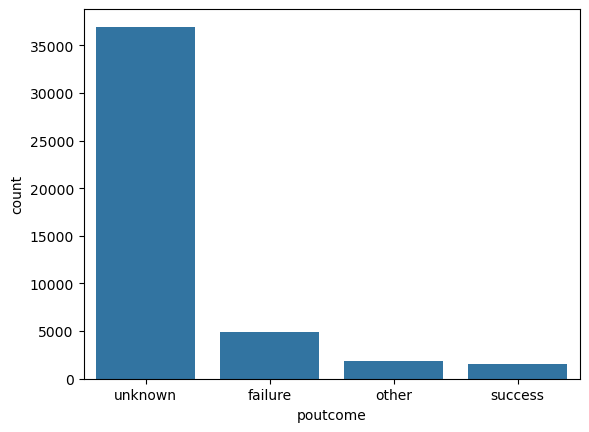

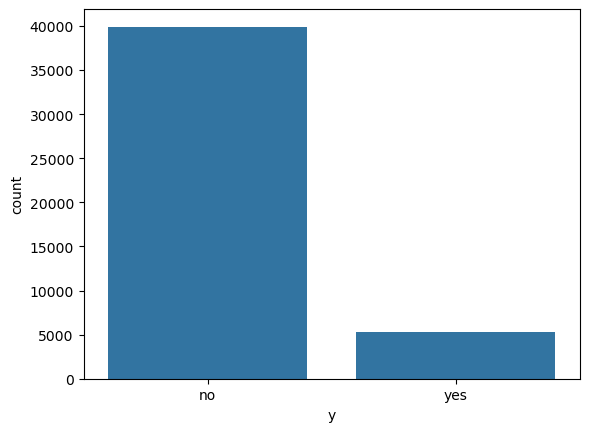

In [63]:
# Distribution of categorical variables
categorical_cols = df.select_dtypes(include = ["object"]).columns
for col in categorical_cols:
    sns.countplot(x = col, data = df)
    plt.show()

Preprocesamiento

In [64]:
# Separeting nominal and binary variables
nominal_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
binary_cols = ['default', 'housing', 'loan']

In [65]:
# Preprocessing wiht ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(drop = 'first'), nominal_cols),  # One-Hot para nominales
        ('label', LabelEncoder(), binary_cols)                   # LabelEncoder para binarias
    ],
    remainder = 'passthrough'
)

In [66]:
# Splitting the data
X = df.drop("y", axis = 1)
y = df["y"]
X_processed = preprocessor.fit_transform(X)

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

In [38]:
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X_processed,
                                                    y,test_size = 0.2,
                                                    random_state = 42)

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)

c:\Users\nenit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Train prediction and evaluation
lr_X_pred = lr_model.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_train, lr_X_pred))
print("Train Classification Report: \n", classification_report(y_train, lr_X_pred))

Train Accuracy:  0.8908980314089803
Train Classification Report: 
               precision    recall  f1-score   support

          no       0.90      0.98      0.94     31970
         yes       0.59      0.20      0.30      4198

    accuracy                           0.89     36168
   macro avg       0.75      0.59      0.62     36168
weighted avg       0.87      0.89      0.87     36168



In [ ]:
# test prediction and evaluation
lr_y_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Train Classification Report: \n", classification_report(y_test, lr_y_pred))

Logistic Regression Accuracy: 0.8862103284308305
Train Classification Report: 
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.58      0.21      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



In [42]:
# Define the hyperparameter grid
param_dist = {
    'max_depth': randint(3, 20),           # Rango de 3 a 20
    'min_samples_split': randint(2, 20),   # Rango de 2 a 20
    'min_samples_leaf': randint(1, 10),    # Rango de 1 a 10
    'max_features': ['sqrt', 'log2', None] # Opciones para features máximos
}

In [43]:
# Instantiate the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state = 42)

In [ ]:
# Instantiate and perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = dt_model, param_distributions = param_dist,
                                  n_iter = 50, scoring = "accuracy", cv = 5,
                                  random_state = 42, n_jobs = -1)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A563D02A20>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A564AA8B90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A564BB81A0>},
                   random_state=42, scoring='accuracy')

In [52]:
# get the best model
best_dt_model = random_search.best_estimator_
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 3}


In [46]:
# Feauture importance
print(best_dt_model.feature_importances_)

[0.08135503 0.01012788 0.00608665 0.00431043 0.         0.04288659
 0.03642956 0.00412625 0.02864278 0.03610552 0.11797092 0.454384
 0.00666759 0.06950609 0.00816634 0.09323438]


In [47]:
# test Prediction 
dt_pred = best_dt_model.predict(X_test)

In [48]:
# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Classifation Report:", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.8917394669910428
Classifation Report:               precision    recall  f1-score   support

          no       0.92      0.96      0.94      7952
         yes       0.57      0.41      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



In [49]:
# Compare the performance of the two models
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Logistic Regression Accuracy: 0.8862103284308305
Decision Tree Accuracy: 0.8917394669910428


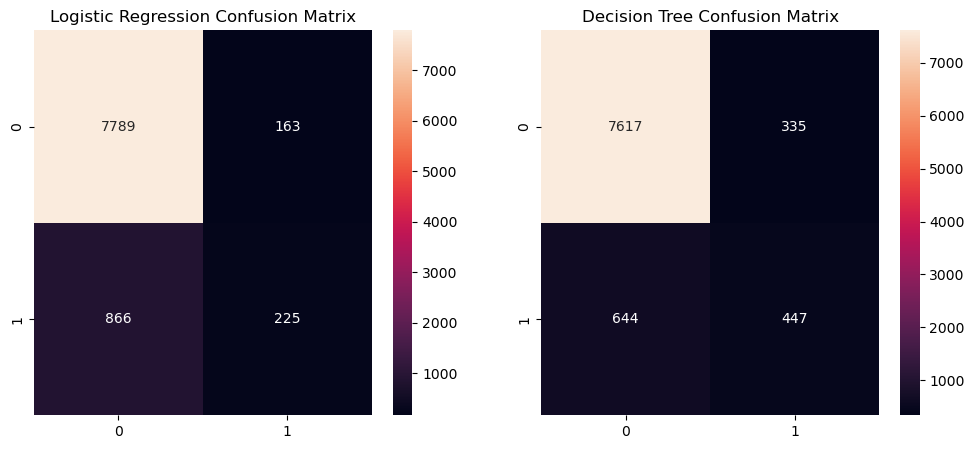

In [ ]:
# Plot both Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.heatmap(confusion_matrix(y_test, lr_y_pred), annot = True,
             fmt = "d", ax = ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, dt_pred), annot = True,
             fmt = "d", ax = ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")
plt.show()

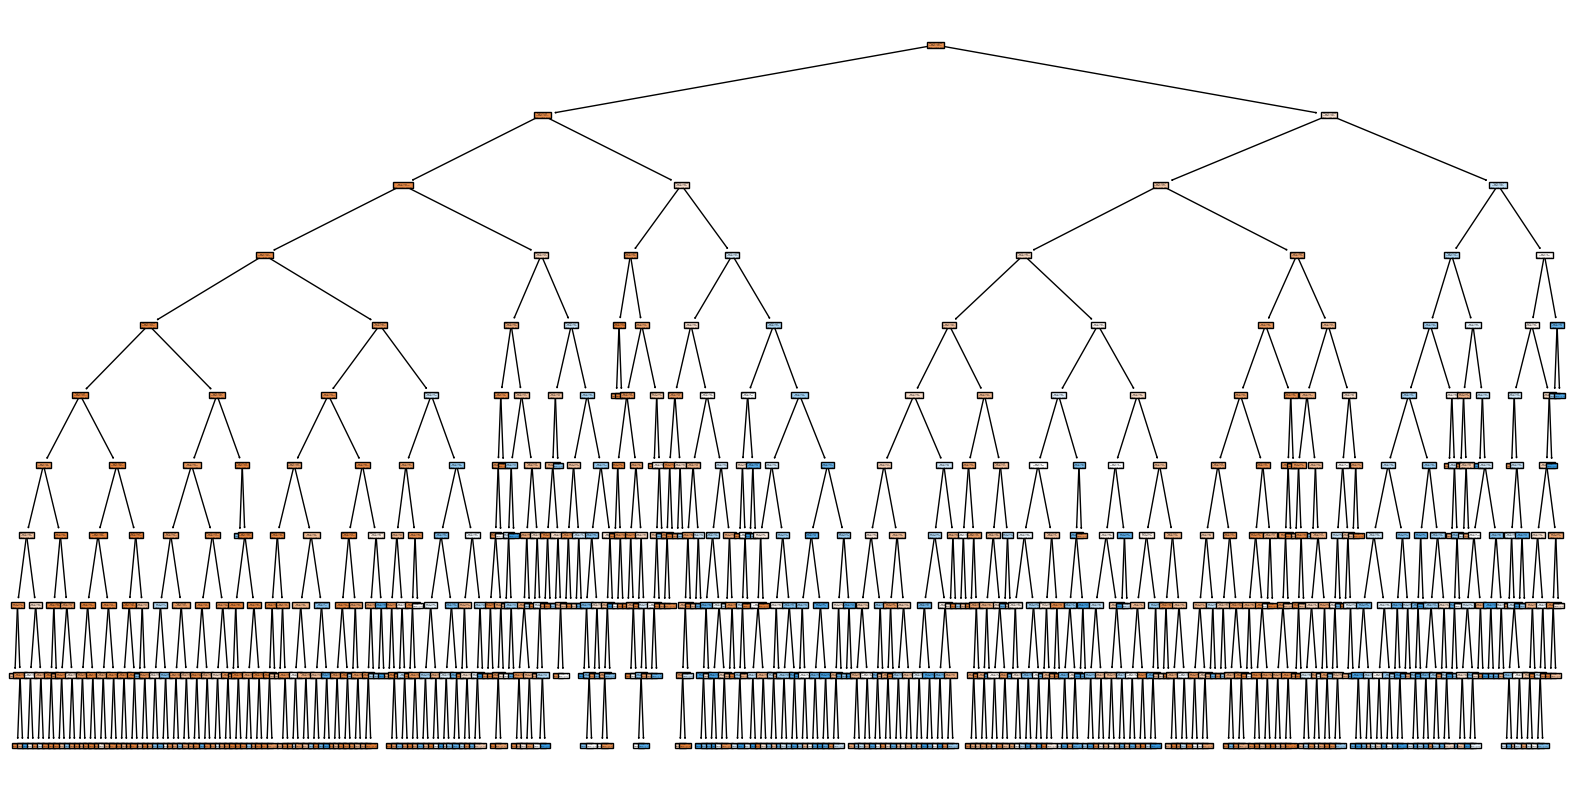

In [51]:
# Visaualize the Decision Tree
plt.figure(figsize = (20,10))
plot_tree(best_dt_model, filled = True, feature_names = X.columns)
plt.show()